# 1 Million Women To Tech:  Summer of Code

## Week 3 - Intro to NLP 

### Day 2 Homeworks - Cristina Tarantino


In [ ]:
# type up the whole Chapter 2 
# (the whole of http://www.nltk.org/book/ch02.html)

In [105]:
%matplotlib inline
%pprint
import matplotlib
import matplotlib.pyplot as plt
import nltk
nltk.download("book", download_dir='./nltk_data')
nltk.download("reuters", download_dir='./nltk_data')
nltk.download("cess_esp", download_dir='./nltk_data')
nltk.download("floresta", download_dir='./nltk_data')
nltk.download("indian", download_dir='./nltk_data')
nltk.data.path.append('./nltk_data')
from nltk.corpus import gutenberg
from nltk.corpus import webtext
from nltk.corpus import nps_chat
from nltk.corpus import brown
from nltk.corpus import reuters
from nltk.corpus import inaugural
from nltk.corpus import udhr
from nltk.corpus import genesis
from nltk.corpus import stopwords
from nltk.corpus import words

Pretty printing has been turned ON
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to ./nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to ./nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to ./nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to ./nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to ./nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to ./nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     ./nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Do

In [11]:
# get gutenberg file identifiers
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [12]:
# get words of this text 
emma = nltk.Text(gutenberg.words('austen-emma.txt'))

# and check the amount of words it contains
len(emma)

192427

In [13]:
# occurrence of a given word, together with some context
emma.concordance("surprize")

Displaying 25 of 25 matches:
her father , was sometimes taken by surprize at his being still able to pity ` p
them do the other any good ." " You surprize me ! Emma must do Harriet good : an
 Knightley actually looked red with surprize and displeasure , as he stood up , 
Mr . Elton , and found to his great surprize , that Mr . Elton was actually on h
nd aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great , 
 father was quite taken up with the surprize of so sudden a journey , and his fe
cy , in all the favouring warmth of surprize and conjecture . She was , moreover
she appeared , to have her share of surprize , introduction , and pleasure . The
eir plans ; and it was an agreeable surprize to her , therefore , to perceive th
 talking aunt had taken me quite by surprize , it must have been the death of me
of all the dialogue which ensued of surprize , and inquiry , and congratulations
e the present . They might chuse to surprize her ." Mrs . Cole had many to agree

In [16]:
# for each file id display avarage word length, avarage sentence length
# and lexical diversity
for fileid in gutenberg.fileids():
    # raw text of the book not split up into tokens    
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [18]:
macbeth_sentence = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentence

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [19]:
macbeth_sentence[1116]

['Double',
 ',',
 'double',
 ',',
 'toile',
 'and',
 'trouble',
 ';',
 'Fire',
 'burne',
 ',',
 'and',
 'Cauldron',
 'bubble']

In [21]:
longest_len = max(len(s) for s in macbeth_sentence)
[s for s in macbeth_sentence if len(s) == longest_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

In [24]:
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [29]:
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

In [31]:
# The Brown Corpus is a convenient resource for studying systematic 
# differences between genres, a kind of linguistic inquiry 
# known as stylistics.
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [33]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [35]:
# G22	cg22	belles_lettres	Reiner: Coping with Runaway Technology
brown.words(fileids='cg22')

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [37]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [40]:
# compare genres in their usage of modal verbs
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ') 
    # in order for the print function to put its output on a single line.

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [43]:
humor_text = brown.words(categories='humor')
fdist = nltk.FreqDist(w.lower() for w in humor_text)
wh = ['what', 'when', 'where', 'why', 'who']
for m in wh:
    print(m + ':', fdist[m], end=' ')

what: 46 when: 62 where: 16 why: 13 who: 49 

In [47]:
# frequency distribution counts for each genre of interest
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))

genres = brown.categories()
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
      adventure    46   151     5    58    27    50 
 belles_lettres   246   213   207   113   170   236 
      editorial   121    56    74    39    53   233 
        fiction    37   166     8    44    55    52 
     government   117    38   153    13   102   244 
        hobbies   268    58   131    22    83   264 
          humor    16    30     8     8     9    13 
        learned   365   159   324   128   202   340 
           lore   170   141   165    49    96   175 
        mystery    42   141    13    57    30    20 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        reviews    45    40    45    26    19    58 
        romance    74   193    11    51    45    43 
science_fiction    16    49     4    12     8    16 


In [66]:
# documents have been classified into 90 topics, 
# and grouped into two sets, called "training" and "test"
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [68]:
# Unlike the Brown Corpus, 
# categories in the Reuters corpus overlap with each other, 
# simply because a news story often covers multiple topics.
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [70]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [72]:
# topics covered by one or more documents
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [74]:
reuters.fileids('barley')

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [77]:
# documents included in one or more categories
reuters.fileids(['barley', 'corn'])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

In [80]:
# specify the words we want in terms of files
# The first handful of words in each of these texts are the titles, 
# which by convention are stored as upper case.
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [82]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [84]:
# specify the words we want in terms of categories
reuters.words(categories='barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [86]:
reuters.words(categories=['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

In [89]:
# Inaugural Address Corpus collection of 55 texts, 
# one for each presidential address.
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [91]:
# An interesting property of this collection is its time dimension:
[fileid[:4] for fileid in inaugural.fileids()]
# Notice that the year of each text appears in its filename. 
# To get the year out of the filename, 
# we extracted the first four characters, using fileid[:4].

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009']

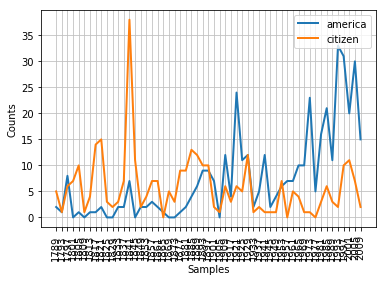

In [151]:
# code converts the words in the Inaugural corpus 
# to lowercase using w.lower(), 
# then checks if they start with either of the 
# "targets" america or citizen using startswith() 
cfd = nltk.ConditionalFreqDist(
            (target, fileid[:4])
            for fileid in inaugural.fileids()
            for w in inaugural.words(fileid)
            for target in ['america', 'citizen']
            if w.lower().startswith(target))

cfd.plot()

# The condition for the ConditionalFreqDist is either of the words america or citizen [2], 
# and the counts being plotted are the number of times the word occured in a particular speech. 
# It exploits the fact that the filename for each speech, e.g., 1865-Lincoln.txt 
# contains the year as the first four characters [1]. 
# This code generates the pair ('america', '1865') for every instance of a word whose lowercased 
# form starts with america — such as Americans — in the file 1865-Lincoln.txt.

In [108]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [112]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [118]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [125]:
# Universal Declaration of Human Rights in over 300 languages
# The fileids for this corpus include information 
# about the character encoding used in the file, such as UTF8 or Latin1.
udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [126]:
udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

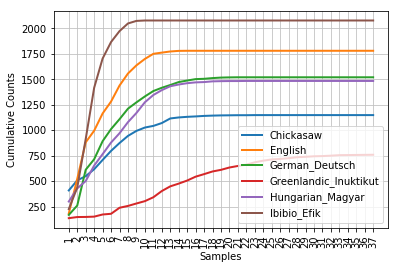

In [41]:
languages = ['Chickasaw', 'English', 'German_Deutsch',
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
            (lang, len(word))
            for lang in languages
            for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

# The condition is the name of the language 
# and the counts being plotted are derived from word lengths. 
# It exploits the fact that the filename for each language is the language name followed by '-Latin1' 
# (the character encoding).

In [42]:
# In the plot() and tabulate() methods, we can optionally specify which conditions to display with a 
# conditions= parameter. When we omit it, we get all the conditions. 
# Similarly, we can limit the samples to display with a samples= parameter. 
# This makes it possible to load a large quantity of data into a conditional frequency distribution, 
# and then to explore it by plotting or tabulating selected conditions and samples. 
# It also gives us full control over the order of conditions and samples in any displays. 
# For example, we can tabulate the cumulative frequency data just for two languages, 
# and for words less than 10 characters long, as shown below. 
# We interpret the last cell on the top row to mean that 1,638 words of the English text have 9 or fewer letters.
cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


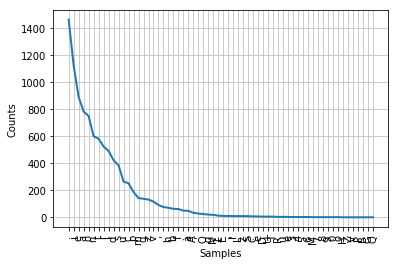

In [153]:
udhr.fileids()
raw_text = udhr.raw('Italian_Italiano-Latin1')
nltk.FreqDist(raw_text).plot()

Basic Corpus Functionality defined in NLTK: more documentation can be found using help(nltk.corpus.reader) and by reading the online Corpus HOWTO at http://nltk.org/howto.

| Example                   	| Description                                               	|
|---------------------------	|-----------------------------------------------------------	|
| fileids()                 	| the files of the corpus                                   	|
| fileids([categories])     	| the files of the corpus corresponding to these categories 	|
| categories()              	| the categories of the corpus                              	|
| categories([fileids])     	| the categories of the corpus corresponding to these files 	|
| raw()                     	| the raw content of the corpus                             	|
| raw(fileids=[f1,f2,f3])   	| the raw content of the specified files                    	|
| raw(categories=[c1,c2])   	| the raw content of the specified categories               	|
| words()                   	| the words of the whole corpus                             	|
| words(fileids=[f1,f2,f3]) 	| the words of the specified fileids                        	|
| words(categories=[c1,c2]) 	| the words of the specified categories                     	|
| sents()                   	| the sentences of the whole corpus                         	|
| sents(fileids=[f1,f2,f3]) 	| the sentences of the specified fileids                    	|
| sents(categories=[c1,c2]) 	| the sentences of the specified categories                 	|
| abspath(fileid)           	| the location of the given file on disk                    	|
| encoding(fileid)          	| the encoding of the file (if known)                       	|
| open(fileid)              	| open a stream for reading the given corpus file           	|
| root                      	| if the path to the root of locally installed corpus       	|
    | readme()                  	| the contents of the README file of the corpus             	|
    

In [154]:
raw = gutenberg.raw("burgess-busterbrown.txt")
# get char 1 to 20
raw[1:20]

'The Adventures of B'

In [157]:
words = gutenberg.words("burgess-busterbrown.txt")
# get word 1 to 20
words[1:20]

['The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920', ']', 'I', 'BUSTER', 'BEAR', 'GOES', 'FISHING', 'Buster', 'Bear']

In [159]:
sents = gutenberg.sents("burgess-busterbrown.txt")
# get sentence 1 to 20
sents[1:20]

[['I'], ['BUSTER', 'BEAR', 'GOES', 'FISHING'], ['Buster', 'Bear', 'yawned', 'as', 'he', 'lay', 'on', 'his', 'comfortable', 'bed', 'of', 'leaves', 'and', 'watched', 'the', 'first', 'early', 'morning', 'sunbeams', 'creeping', 'through', 'the', 'Green', 'Forest', 'to', 'chase', 'out', 'the', 'Black', 'Shadows', '.'], ['Once', 'more', 'he', 'yawned', ',', 'and', 'slowly', 'got', 'to', 'his', 'feet', 'and', 'shook', 'himself', '.'], ['Then', 'he', 'walked', 'over', 'to', 'a', 'big', 'pine', '-', 'tree', ',', 'stood', 'up', 'on', 'his', 'hind', 'legs', ',', 'reached', 'as', 'high', 'up', 'on', 'the', 'trunk', 'of', 'the', 'tree', 'as', 'he', 'could', ',', 'and', 'scratched', 'the', 'bark', 'with', 'his', 'great', 'claws', '.'], ['After', 'that', 'he', 'yawned', 'until', 'it', 'seemed', 'as', 'if', 'his', 'jaws', 'would', 'crack', ',', 'and', 'then', 'sat', 'down', 'to', 'think', 'what', 'he', 'wanted', 'for', 'breakfast', '.'], ['While', 'he', 'sat', 'there', ',', 'trying', 'to', 'make', 'up

In [6]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = './PlaintextCorpusReader'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()
wordlists.words('homeworks')

['Day', '1', '.', 'For', 'Certification', 'we', ...]

In [11]:
from nltk.corpus import BracketParseCorpusReader
corpus_root = r"./treebank"
file_pattern = r".*/wsj_.*\.mrg"
ptb = BracketParseCorpusReader(corpus_root, file_pattern)
ptb.fileids()
len(ptb.sents())
ptb.sents(fileids='combined/wsj_0001.mrg')[1]

['Mr.', 'Vinken', 'is', 'chairman', 'of', 'Elsevier', 'N.V.', ',', 'the', 'Dutch', 'publishing', 'group', '.']

In [20]:
# N.B. BELOW IS REALLY IMPORTANT
# A conditional frequency distribution is a collection of frequency distributions, 
# each one for a different "condition". The condition will often be the category of the text.

# A frequency distribution counts observable events, such as the appearance of words in a text. 
# A conditional frequency distribution needs to pair each event with a condition. 
# So instead of processing a sequence of words [1], we have to process a sequence of pairs [2]:
# Each pair has the form (condition, event).
# text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...] # [1]
# pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...] # [2]

# For each genre [2], we loop over every word in the genre [3], 
# producing pairs consisting of the genre and the word [1]
genre_word = [(genre, word) # [1]
              for genre in ['news', 'romance'] # [2]
              for word in brown.words(categories=genre)] # [3]

len(genre_word)

170576

In [22]:
# pairs at the beginning of the list genre_word will be of the form ('news', word)
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [25]:
# while those at the end will be of the form ('romance', word)
genre_word[-4:]

[('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]

In [27]:
# We can now use this list of pairs to create a ConditionalFreqDist, and save it in a variable cfd. 
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

<ConditionalFreqDist with 2 conditions>

In [30]:
# verify it has two conditions
cfd.conditions()

['news', 'romance']

In [31]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [34]:
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


In [37]:
cfd['romance'].most_common(20)

[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993), ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690), ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]

In [39]:
cfd['romance']['could']

193

In [45]:
# search in the file FreqDist to compare
cfd = nltk.ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
           for word in brown.words(categories=genre))
cfd

<ConditionalFreqDist with 15 conditions>

In [48]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',  'Friday', 'Saturday','Sunday']
cfd.tabulate(samples=days)

                   Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
      adventure         1         0         0         0         0         0         0 
 belles_lettres         0         1         1         2         2         0         4 
      editorial         1         0         1         1         0         3         4 
        fiction         0         2         1         2         1         3         3 
     government         3         1         0         1         0         4         9 
        hobbies         1         0         0         1         3         0         2 
          humor         1         0         0         0         0         3         0 
        learned         0         4         3         1         3         1         1 
           lore         0         1         1         1         2         2         5 
        mystery         5         2         1         1         2         2         4 
           news        54        43        

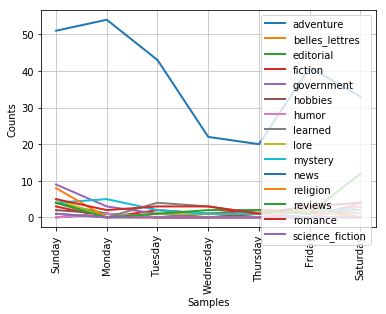

In [52]:
cfd.plot(samples=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday',  'Friday', 'Saturday'])

In [54]:
# We can use a conditional frequency distribution to create a table of bigrams (word pairs). 
# The bigrams() function takes a list of words and builds a list of consecutive word pairs. 
# Remember that, in order to see the result and not a cryptic "generator object", 
# we need to use the list() function:

sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven','and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'), ('the', 'beginning'), ('beginning', 'God'), ('God', 'created'), ('created', 'the'), ('the', 'heaven'), ('heaven', 'and'), ('and', 'the'), ('the', 'earth'), ('earth', '.')]

In [66]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ') # print the current value of the variable word
        word = cfdist[word].max() # reset word to be the most likely token in that context (using max())

text = genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
cfd['living']
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

| Example                              	| Description                                                      	|
|--------------------------------------	|------------------------------------------------------------------	|
| cfdist = ConditionalFreqDist(pairs)  	| create a conditional frequency distribution from a list of pairs 	|
| cfdist.conditions()                  	| the conditions                                                   	|
| cfdist[condition]                    	| the frequency distribution for this condition                    	|
| cfdist[condition][sample]            	| frequency for the given sample for this condition                	|
| cfdist.tabulate()                    	| tabulate the conditional frequency distribution                  	|
| cfdist.tabulate(samples, conditions) 	| tabulation limited to the specified samples and conditions       	|
| cfdist.plot()                        	| graphical plot of the conditional frequency distribution         	|
| cfdist.plot(samples, conditions)     	| graphical plot limited to the specified samples and conditions   	|
| cfdist1 < cfdist2                    	| test if samples in cfdist1 occur less frequently than in cfdist2 	|

In [69]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

kjv = genesis.words('english-kjv.txt')
lexical_diversity(kjv)

0.06230453042623537

In [73]:
# The endswith() function is always associated with a string object (e.g., word in 3.1). 
# To call such functions, we give the name of the object, a period, and then the name of the function. 
# These functions are usually known as methods.
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

plural('fairy')

'fairies'

In [78]:
plural('woman')

'women'

In [77]:
# N.B I am skipping modules as by now I have showned my understanding of modules plus we studied this in week 1

# 4 Lexical Resources

A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions. Lexical resources are secondary to texts, and are usually created and enriched with the help of texts. For example, if we have defined a text my_text, then vocab = sorted(set(my_text)) builds the vocabulary of my_text, while  word_freq = FreqDist(my_text) counts the frequency of each word in the text. Both of vocab and word_freq are simple lexical resources. Similarly, a concordance like the one we saw in 1 gives us information about word usage that might help in the preparation of a dictionary. Standard terminology for lexicons is illustrated in 4.1. A lexical entry consists of a headword (also known as a lemma) along with additional information such as the part of speech and the sense definition. Two distinct words having the same spelling are called homonyms.

![alt text](http://www.nltk.org/images/lexicon.png "Lexicon Terminology")

Lexicon Terminology: lexical entries for two lemmas having the same spelling (homonyms), providing part of speech and gloss information.

The simplest kind of lexicon is nothing more than a sorted list of words. Sophisticated lexicons include complex structure within and across the individual entries. In this section we'll look at some lexical resources included with NLTK.

In [80]:
def unusual_words(text):
    # get all the unique words that constain alphabetical chars and lower case them from the given text 
    text_vocab = set(w.lower() for w in text if w.isalpha())
    # get all the unique words and lower case them from the dictionary
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    # remove from the text the words from the dictionary to get the unusual words     
    unusual = text_vocab - english_vocab
    # return the unusual words sorted     
    return sorted(unusual)

In [82]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [84]:
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

In [90]:
# There is also a corpus of stopwords, that is, high-frequency words like the, 
# to and also that we sometimes want to filter out of a document before further processing. 
# Stopwords usually have little lexical content, and their presence 
# in a text fails to distinguish it from other texts.
# !!!IMPORTANT
stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [91]:
stopwords.words('italian')

['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 'vostra', 'vostri', 'vostre', 'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'gli', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 'anche', 'come', 'dov', 'dove', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta', 'quante', 'quello', 'quelli', 'quella', 'quelle', 'questo', 'questi', 'questa', 'queste', 'si', 'tutto', 'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'ab

In [102]:
# Compute what fraction of words in a text are not in the stopwords list
def content_fraction(text):
    wordlist = stopwords.words('english')
    content = [w for w in text if w.lower() not in wordlist]
    return len(content) /len(text)

content_fraction(reuters.words())

0.735240435097661

In [108]:
# Word Puzzle
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = words.words()
# iterates through every word and, for each one, checks whether it contains the
# obligatory letter and length constraints.
# The FreqDist comparison method permits us to check that the frequency of each letter in the candidate word 
# is less than or equal to the frequency of the corresponding letter in the puzzle
[w for w in wordlist if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [114]:
# One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. 
# The male and female names are stored in separate files. 
# Let's find names which appear in both files, i.e. names that are ambiguous for gender:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [121]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

In [125]:
cfd = nltk.ConditionalFreqDist(
            (fileid, name[-1])
            for fileid in names.fileids()
            for name in names.words(fileid))

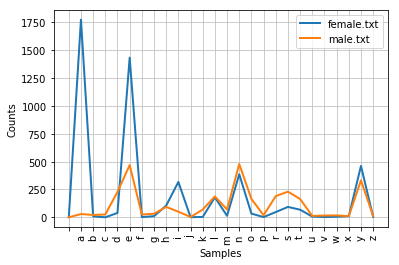

In [126]:
cfd.plot()
# Conditional Frequency Distribution: this plot shows the number of female and male names 
# ending with each letter of the alphabet; most names ending with a, e or i are female; 
# names ending in h and l are equally likely to be male or female; 
# names ending in k, o, r, s, and t are likely to be male.